In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflecting an existing database into a new model
Base = automap_base()

# Reflecting tables
Base.prepare(engine, reflect=True)

In [7]:
# Viewing all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Creating our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Creating inspector and getting table names 
inspector = inspect(engine)

In [11]:
# Getting "measurement" table column names and types
measurement_columns = inspector.get_columns("measurement")
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Getting "station" table column names and types
station_columns = inspector.get_columns("station")
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

##### Designing a query to retrieve the last 12 months of precipitation data and plot the results


In [13]:
# Calculating the date 1 year ago from the last data point in the database

# --- Calculating last date in the DB
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
# --- Transforming query to a time object
last_date_converted = (dt.datetime.strptime(last_date, "%Y-%m-%d")).date()
# --- Calculating last date in the DB - 1 year ago
year_ago = last_date_converted - dt.timedelta(days = 365)

In [14]:
# Performing a query to retrieve the date and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.date <= last_date).\
    filter(Measurement.station == Station.station).all()

In [15]:
# Saving the query results as a Pandas DataFrame, setting the index to the date column and sorting by date
prcp_df = pd.DataFrame(prcp, columns = ["Date", "Precipitation"]).sort_values("Date")
prcp_df.set_index("Date", inplace = True)

# Droping null values 
prcp_df.dropna(axis = 0, how = "any", inplace = True)

# Printing final df 
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


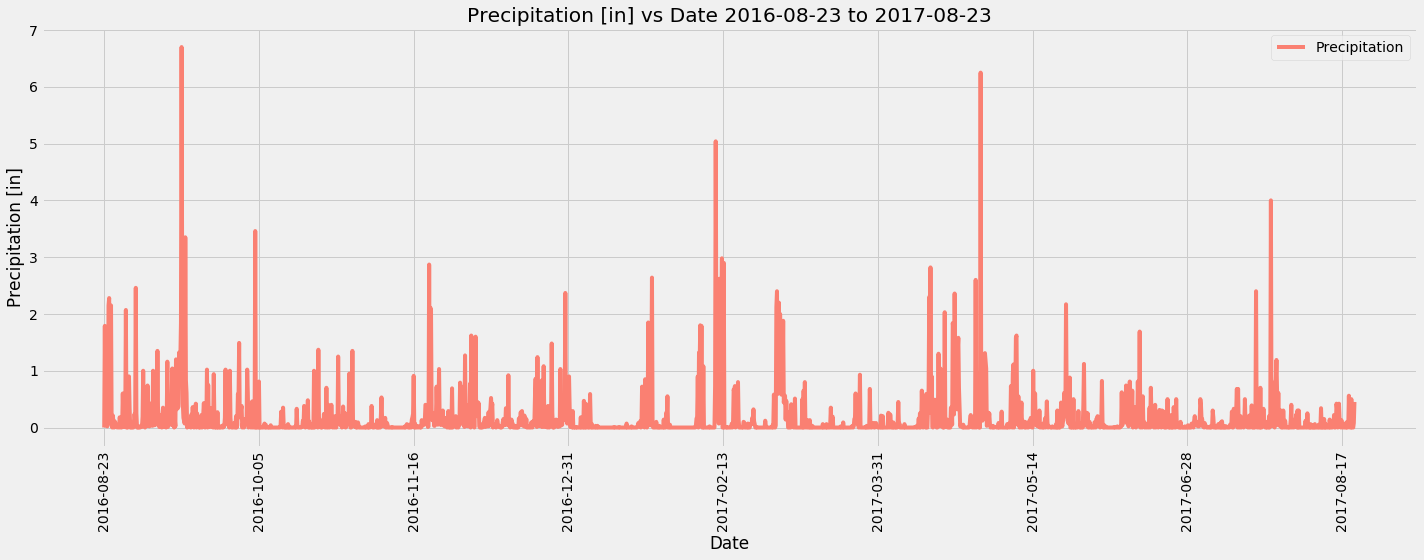

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = (20, 8), rot = 90, color = "salmon")
plt.title(f"Precipitation [in] vs Date {year_ago} to {last_date}")
plt.ylabel("Precipitation [in]")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##### Station Analysis

In [18]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Station).count()
print(f"There are {number_of_stations} stations available in the dataset.")

There are 9 stations available in the dataset.


In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.prcp)).\
    group_by(Station.name).\
    filter(Measurement.station == Station.station).\
    order_by(func.count(Measurement.prcp).desc()).all()

# Saving the query results as a Pandas DataFrame
active_stations_df = pd.DataFrame(active_stations, columns = ["Station ID", "Station Name", "Row Count"])
active_stations_df

,Station ID,Station Name,Row Count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00513117,"KANEOHE 838.1, HI US",2696
2,USC00519397,"WAIKIKI 717.2, HI US",2685
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,USC00517948,"PEARL CITY, HI US",683
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [29]:
# Plot the daily normals as an area plot with `stacked=False`
